In [57]:
# Data preprocessing  
#importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [58]:
#importing the dataset
data = pd.read_csv('data.csv', header=None)

In [59]:
#rename columns
d = data.copy()
d.columns = ["q{}".format(i+1) for i in range(len(d.columns))]
columns_real = ["q309", "q311", "q319", "q119", "q298", "q165", "q2", "q62"] 
names = {
    "q309": "Sex", "q165": "Religion",
    "q311": "Age", "q319": "Education",
    "q119": "Satisfaction_with_life",
    "q298": "Employment_status",
    "q2": "Country",
    "q62": "Satisfaction_with_financial_situation_of_household",
    "q119": "Trust_the_government"
}
columns_real_new = [names.get(x, x) for x in columns_real]
d = d[columns_real]
d = d.rename(columns=names)

In [60]:
#removing missing values (less than -1)
d = d.dropna()
for column in columns_real_new:
    #if column != "Salary_satisfaction":
     d = d[d[column] > -1]
d["Religion"] = d["Religion"].apply(lambda x: 1 if x > 0 else x)
d

,Sex,Age,Education,Trust_the_government,Employment_status,Religion,Country,Satisfaction_with_financial_situation_of_household
0,1,21,7.0,4,6,1,12,10
1,2,24,7.0,2,6,1,12,10
2,2,26,5.0,2,3,1,12,6
3,2,28,6.0,3,1,1,12,6
4,2,35,3.0,3,3,1,12,4
...,...,...,...,...,...,...,...,...
90345,2,41,4.0,1,7,1,716,1
90346,1,27,5.0,4,7,1,716,1
90347,2,37,2.0,4,5,1,716,3
90348,2,32,5.0,4,7,1,716,1


In [61]:
#defining countries 
countries = """
     -5 'Missing; Unknown'
     -4 'Not asked in survey'
     -3 'Not applicable'
     -2 'No answer'
     -1 'Don't know'
     4 'Afghanistan'
     8 'Albania'
     12 'Algeria'
     16 'American Samoa'
     20 'Andorra'
     24 'Angola'
     28 'Antigua'
     31 'Azerbaijan'
     32 'Argentina'
     36 'Australia'
     40 'Austria'
     48 'Bahrain'
     50 'Bangladesh'
     51 'Armenia'
     52 'Barbados'
     56 'Belgium'
     60 'Bermuda'
     64 'Bhutan'
     68 'Bolivia'
     70 'Bosnia Herzegovina'
     72 'Botswana'
     76 'Brazil'
     84 'Belize'
     100 'Bulgaria'
     101 'SrpSka Republic'
     104 'Myanmar'
     108 'Burundi'
     112 'Belarus'
     116 'Cambodia'
     120 'Cameroon'
     124 'Canada'
     132 'Cape Verde'
     144 'Sri Lanka'
     148 'Chad'
     152 'Chile'
     156 'China'
     158 'Taiwan'
     170 'Colombia'
     180 'D.R. Congo'
     184 'Cook Islands'
     188 'Costa Rica'
     191 'Croatia'
     192 'Cuba'
     196 'Cyprus'
     197 'Cyprus (T)'
     203 'Czech Rep.'
     204 'Benin'
     208 'Denmark'
     214 'Dominican Rep.'
     218 'Ecuador'
     222 'El Salvador'
     226 'Eq.Guinea'
     231 'Ethiopia'
     232 'Eritrea'
     233 'Estonia'
     246 'Finland'
     250 'France'
     268 'Georgia'
     270 'Gambia'
     275 'Palestine'
     276 'Germany'
     288 'Ghana'
     292 'Gibraltar'
     300 'Greece'
     320 'Guatemala'
     324 'Guinea'
     328 'Guyana'
     332 'Haiti'
     340 'Honduras'
     344 'Hong Kong'
     348 'Hungary'
     352 'Iceland'
     356 'India'
     360 'Indonesia'
     364 'Iran'
     368 'Iraq'
     372 'Ireland'
     376 'Israel'
     380 'Italy'
     384 'Côte d'Ivoire'
     388 'Jamaica'
     392 'Japan'
     398 'Kazakhstan'
     400 'Jordan'
     404 'Kenya'
     408 'North Korea'
     410 'South Korea'
     414 'Kuwait'
     417 'Kyrgyzstan'
     418 'Laos'
     422 'Lebanon'
     426 'Lesotho'
     428 'Latvia'
     430 'Liberia'
     434 'Libya'
     438 'Liechtenstein'
     440 'Lithuania'
     442 'Luxembourg'
     450 'Madagascar'
     454 'Malawi'
     458 'Malaysia'
     466 'Mali'
     470 'Malta'
     474 'Martinique'
     478 'Mauritania'
     480 'Mauritius'
     484 'Mexico'
     492 'Monaco'
     496 'Mongolia'
     498 'Moldova'
     499 'Montenegro'
     504 'Morocco'
     508 'Mozambique'
     512 'Oman'
     516 'Namibia'
     524 'Nepal'
     528 'Netherlands'
     554 'New Zealand'
     558 'Nicaragua'
     562 'Niger'
     566 'Nigeria'
     578 'Norway'
     586 'Pakistan'
     591 'Panama'
     598 'Papua New Guinea'
     600 'Paraguay'
     604 'Peru'
     608 'Philippines'
     616 'Poland'
     620 'Portugal'
     624 'Guinea-Bissau'
     626 'Timor-Leste'
     630 'Puerto Rico'
     634 'Qatar'
     642 'Romania'
     643 'Russia'
     646 'Rwanda'
     682 'Saudi Arabia'
     686 'Senegal'
     688 'Serbia'
     690 'Seychelles'
     694 'Sierra Leone'
     702 'Singapore'
     703 'Slovakia'
     704 'Viet Nam'
     705 'Slovenia'
     706 'Somalia'
     710 'South Africa'
     716 'Zimbabwe'
     724 'Spain'
     736 'Sudan'
     740 'Suriname'
     748 'Swaziland'
     752 'Sweden'
     756 'Switzerland'
     760 'Syria'
     762 'Tajikistan'
     764 'Thailand'
     768 'Togo'
     780 'Trinidad and Tobago'
     784 'United Arab Emirates'
     788 'Tunisia'
     792 'Turkey'
     795 'Turkmenistan'
     800 'Uganda'
     804 'Ukraine'
     807 'Macedonia'
     818 'Egypt'
     826 'United Kingdom'
     834 'Tanzania'
     840 'United States'
     850 'U.S. Virgin Islands'
     854 'Burkina Faso'
     858 'Uruguay'
     860 'Uzbekistan'
     862 'Venezuela'
     887 'Yemen'
     891 'Serbia and Montenegro'
     894 'Zambia'
     900 'West Germany'
     901 'East Germany'
     902 'Tambov'
     903 'Moscow'
     904 'Basque Country'
     906 'Andalusia'
     907 'Galicia'
     908 'Great Britain'
     909 'North Ireland'
     910 'Valencia'
     911 'Serbia'
     912 'Montenegro'
     913 'Serbian Bosnia'
     914 'Bosnia'
     915 'Kosovo'
     916 'Flanders-Belgium'
     917 'Israel (Jews)'
     918 'Israel (Arabs)'
"""

In [62]:
#convert country string into a dictionary
import re
countries = countries.split('\n')
countries = [x.strip() for x in countries if x]
country_re = r"([\-]{0,1}[0-9]+)[ ]*\'(.*)\'"
countries = [re.findall(country_re, x)[0] for x in countries]
countries = {int(k): v for k, v in countries}

In [63]:
#definig regions
africa = """Burundi
Comoros
Djibouti
Eritrea
Libya
Ethiopia
Kenya
Cook Islands
Madagascar
Malawi
Mauritius
Mayotte
Mozambique
Reunion
Rwanda
Seychelles
Somalia
Tanzania, United Republic of
Uganda
Zambia
Zimbabwe
Angola
Cameroon
Central African Republic
Chad
Congo
D.R. Congo
Eq.Guinea
Gabon
Sao Tome and Principe
Algeria
Egypt
Libyan Arab Jamahiriya
Morroco
Côte d'Ivoire
South Sudan
Sudan
Tunisia
Western Sahara
Botswana
Eswatini
Lesotho
Namibia
South Africa
Benin
Burkina Faso
Cape Verde
Cote d'Ivoire
Gambia
Ghana
Guinea
Guinea-Bissau
Liberia
Mali
Mauritania
Niger
Nigeria
Tanzania
Morocco
Saint Helena
Senegal
Sierra Leone
Swaziland
Togo""".split("\n")
africa
carribean = """Anguilla
Antigua
Aruba
Bahamas
Barbados
Bonaire, Saint Eustatius and Saba
British Virgin Islands
Cayman Islands
Cuba
Curaçao
Dominica
Dominican Rep.
Grenada
Guadeloupe
Haiti
Jamaica
U.S. Virgin Islands
Martinique
Monserrat
Puerto Rico
Saint-Barthélemy
St. Kitts and Nevis
Saint Lucia
Saint Martin
Saint Vincent and the Grenadines
Sint Maarten
Trinidad and Tobago
Turks and Caicos Islands
Virgin Islands""".split("\n")
carribean
camerica = """Belize
Costa Rica
El Salvador
Guatemala
Honduras
Mexico
Nicaragua
Panama""".split("\n")
camerica
samerica = """Argentina
Bolivia
Brazil
Chile
Colombia
Ecuador
Falkland Islands
French Guiana
Guyana
Paraguay
Peru
Suriname
Uruguay
Venezuela""".split("\n")
samerica
namerica = """Bermuda
Canada
Greenland
Saint Pierre and Miquelon
United States""".split("\n")
namerica
asia = """Afghanistan
Armenia
Azerbaijan
Bangladesh
Bhutan
Brunei Darussalam
Cambodia
China
Georgia
Hong Kong
India
Indonesia
Japan
Kazakhstan
North Korea
South Korea
Kyrgyzstan
Laos
Macao
Malaysia
Maldives
Mongolia
Myanmar
Nepal
Pakistan
Phillipines
Philippines
Singapore
Sri Lanka
Taiwan
Timor-Leste
Tajikistan
Thailand
Timor Leste
Turkmenistan
Viet Nam
Uzbekistan
Vietnam """.split("\n")
asia
europe = """Albania
Andorra
Belarus
Bosnia Herzegovina
Bosnia
Croatia
Faroe Islands
Gibraltar
Guerney and Alderney
Iceland
Jersey
North Ireland
Kosovo
Liechtenstein
Man, Island of
Moldova
Monaco
Montenegro
North Macedonia
Norway
Russia
San Marino
SrpSka Republic
Serbia
Svalbard and Jan Mayen Islands
Switzerland
Turkey
Ukraine
United Kingdom
Vatican City State
Austria
Belgium
Bulgaria
Cyprus
Cyprus (T)
Czech Rep.
Denmark
Estonia
Finland
France
Germany
West Germany
East Germany
Greece
Hungary
Ireland
Italy
Latvia
Lithuania
Luxembourg
Malta
Netherlands
Macedonia
Poland
Portugal
Great Britain
Romania
Slovakia
Slovenia
Serbia and Montenegro
Spain
Valencia
Galicia
Andalusia
Flanders-Belgium
Basque Country
Serbian Bosnia
Tambov
Moscow
Sweden""".split("\n")
europe
mideast = """Bahrain
Iraq
Iran
Israel (Jews)
Israel (Arabs)
Israel
Jordan
Kuwait
Lebanon
Oman
Palestine
Qatar
Saudi Arabia
Syria
United Arab Emirates
Yemen""".split("\n")
mideast
oceania = """Australia
Fiji
French Polynesia
Guam
Kiribati
Marshall Islands
Micronesia
New Caledonia
New Zealand
Papua New Guinea
Samoa
American Samoa
Solomon, Islands
Tonga
Vanuatu""".split("\n")
oceania
regions = {'Africa': africa, 'Carribean': carribean, 'Central America': camerica, 'South America': samerica, 'Northern America': namerica, 'Asia': asia, 'Europe': europe, 'Middle East': mideast, 'Oceania': oceania}

In [64]:
#adding region column
country_to_region = {
    c: r
    for r, c_l in regions.items()
    for c in c_l
}
int_country_to_region = {k: f"Country_{country_to_region.get(c)}" for k, c in countries.items()}
d["Region"] = d["Country"].apply(int_country_to_region.get)

In [65]:
#transforming region into wide format
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
reg_encoded = enc.fit_transform(d[["Region"]])
reg_encoded = pd.DataFrame(
    reg_encoded.toarray(),
    columns=enc.categories_[0]
)
d2 = pd.concat([d.reset_index(), reg_encoded], axis=1)

d2 = d2.drop(columns=["Country", "Region", "index"])
d2

,Sex,Age,Education,Trust_the_government,Employment_status,Religion,Satisfaction_with_financial_situation_of_household,Country_Africa,Country_Asia,Country_Carribean,Country_Central America,Country_Europe,Country_Middle East,Country_Northern America,Country_Oceania,Country_South America
0,1,21,7.0,4,6,1,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,24,7.0,2,6,1,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,26,5.0,2,3,1,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,28,6.0,3,1,1,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,35,3.0,3,3,1,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78647,2,41,4.0,1,7,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78648,1,27,5.0,4,7,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78649,2,37,2.0,4,5,1,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78650,2,32,5.0,4,7,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
d2["Trust_the_government"] = d2["Trust_the_government"].apply(lambda x: 0 if x<3 else x)
d2["Trust_the_government"] = d2["Trust_the_government"].apply(lambda x: 1 if x>2 else x)
# 2 is "don;t trust", then remap to 0 is don't trust and 1 is trust
d2["Sex"] = d2["Sex"].apply(lambda x: 0 if x == 2 else x)
# Set Female to 0, Male to 1
d2.describe()

,Sex,Age,Education,Trust_the_government,Employment_status,Religion,Satisfaction_with_financial_situation_of_household,Country_Africa,Country_Asia,Country_Carribean,Country_Central America,Country_Europe,Country_Middle East,Country_Northern America,Country_Oceania,Country_South America
count,78652.000000,78652.000000,78652.000000,78652.000000,78652.000000,78652.000000,78652.000000,78652.000000,78652.000000,78652.000000,78652.000000,78652.000000,78652.000000,78652.000000,78652.000000,78652.000000
mean,0.484603,42.011430,5.678470,0.527755,3.384122,0.810927,5.897930,0.184496,0.336381,0.011862,0.025238,0.237082,0.064283,0.027234,0.021665,0.091759
std,0.499766,16.479154,2.402764,0.499232,2.147961,0.391569,2.446926,0.387891,0.472474,0.108267,0.156847,0.425296,0.245258,0.162765,0.145588,0.288687
min,0.000000,16.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,4.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,40.000000,6.000000,1.000000,3.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,54.000000,8.000000,1.000000,5.000000,1.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,99.000000,9.000000,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

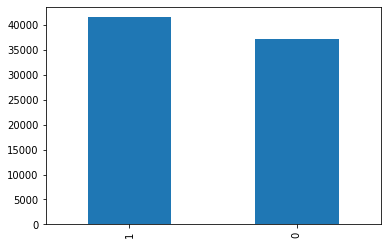

In [67]:
# Rooms number distribution
distribution = d2['Trust_the_government'].value_counts()
distribution.plot(kind='bar')

In [68]:
# Fitting Multiple Linear Regression to the Training set
#Splitting the dataset into the Training set and Test set
X = d2[[c for c in d2.columns if c != "Trust_the_government"]]
y = d2["Trust_the_government"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [69]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [70]:
d2[[c for c in d2.columns if c != "Trust_the_government"]].columns

Index(['Sex', 'Age', 'Education', 'Employment_status', 'Religion',
       'Satisfaction_with_financial_situation_of_household', 'Country_Africa',
       'Country_Asia', 'Country_Carribean', 'Country_Central America',
       'Country_Europe', 'Country_Middle East', 'Country_Northern America',
       'Country_Oceania', 'Country_South America'],
      dtype='object')

In [71]:
import statsmodels.api as sm
lr = sm.Logit(y_train,X_train).fit(method='newton', maxiter=2000)

print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.671802
         Iterations 4
                           Results: Logit
Model:              Logit                Pseudo R-squared: 0.029     
Dependent Variable: Trust_the_government AIC:              84568.9069
Date:               2020-12-14 23:52     BIC:              84695.6018
No. Observations:   62921                Log-Likelihood:   -42270.   
Df Model:           13                   LL-Null:          -43515.   
Df Residuals:       62907                LLR p-value:      0.0000    
Converged:          1.0000               Scale:            1.0000    
No. Iterations:     4.0000                                           
----------------------------------------------------------------------
      Coef.     Std.Err.      z      P>|z|      [0.025        0.975]  
----------------------------------------------------------------------
x1    0.0544       0.0083    6.5884  0.0000        0.0383       0.0706
x2   -0.0468

In [72]:
X_train = X_train[:,[0, 1, 2, 3, 5]]
X_test = X_test[:,[0, 1, 2, 3, 5]]

In [73]:
# Fitting Logistic Regression to the Training set (4 variables)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [74]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.5396986841268833

In [75]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2087 5358]
 [1883 6403]]


In [76]:
def predict_thresh(clf, x, thresh):
    y_prob = clf.predict_proba(x)
    func = np.vectorize(lambda t: t > thresh)
    y_prob = func(y_prob)
    y_tst = y_prob.argmax(axis=1)
#     y_tst = np.array([d>thresh for d in y_prob])
    return y_tst

In [77]:
from sklearn.metrics import classification_report
threshold = 0.4
print(classification_report(y_train, predict_thresh(lr, X_train, threshold)))
print(classification_report(y_test, predict_thresh(lr, X_test, threshold)))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_thresh(lr, X_test, threshold))
print(cm)

              precision    recall  f1-score   support

           0       0.48      0.96      0.64     29698
           1       0.62      0.06      0.10     33223

    accuracy                           0.48     62921
   macro avg       0.55      0.51      0.37     62921
weighted avg       0.55      0.48      0.36     62921

              precision    recall  f1-score   support

           0       0.48      0.96      0.64      7445
           1       0.64      0.06      0.11      8286

    accuracy                           0.49     15731
   macro avg       0.56      0.51      0.37     15731
weighted avg       0.56      0.49      0.36     15731

[[7173  272]
 [7808  478]]


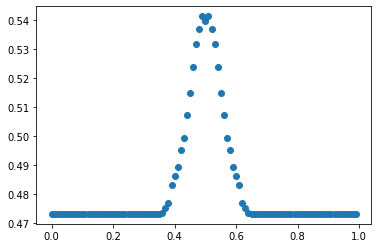

In [78]:
from sklearn.metrics import accuracy_score
thresholds = np.arange(0,1,0.01)
accs = [accuracy_score(y_test, predict_thresh(lr, X_test, thresgold)) for thresgold in thresholds]
plt.scatter(thresholds, accs)